In [41]:
from sklearn.datasets import make_regression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
X, y = make_regression(
    n_samples=100,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=10,
    random_state=42
)
X[:5]

array([[ 0.93128012],
       [ 0.08704707],
       [-1.05771093],
       [ 0.31424733],
       [-0.47917424]])

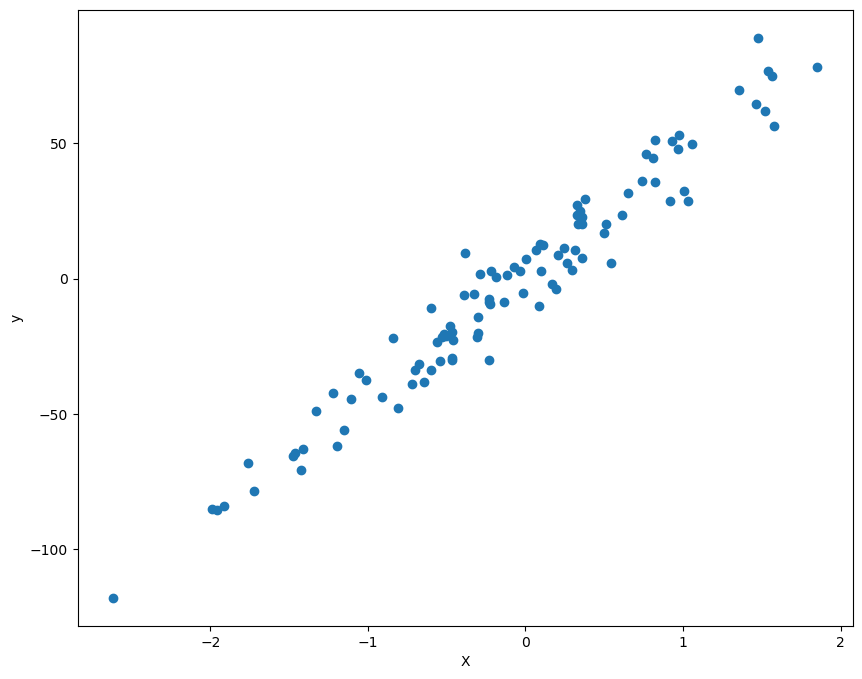

In [25]:
plt.figure(figsize=(10, 8))
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y');

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=42
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 1), (80,), (20, 1), (20,))

In [29]:
from sklearn.tree import DecisionTreeRegressor

tree_over = DecisionTreeRegressor(
    random_state=1
)
tree_over.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [33]:
from sklearn.metrics import mean_squared_error


pred_train_over = tree_over.predict(X_train)
mse_train_over = mean_squared_error(y_train, pred_train_over)

print(f'MSE на обучении {mse_train_over:.2f}')

MSE на обучении 0.00


In [37]:
pd.DataFrame({
    'ground truth': y_train,
    'prediction': pred_train_over 
})

,ground truth,prediction
0,24.781612,24.781612
1,-37.499144,-37.499144
2,-11.019267,-11.019267
3,61.912333,61.912333
4,46.073157,46.073157
...,...,...
75,27.166487,27.166487
76,-63.166093,-63.166093
77,-47.811465,-47.811465
78,10.491670,10.491670


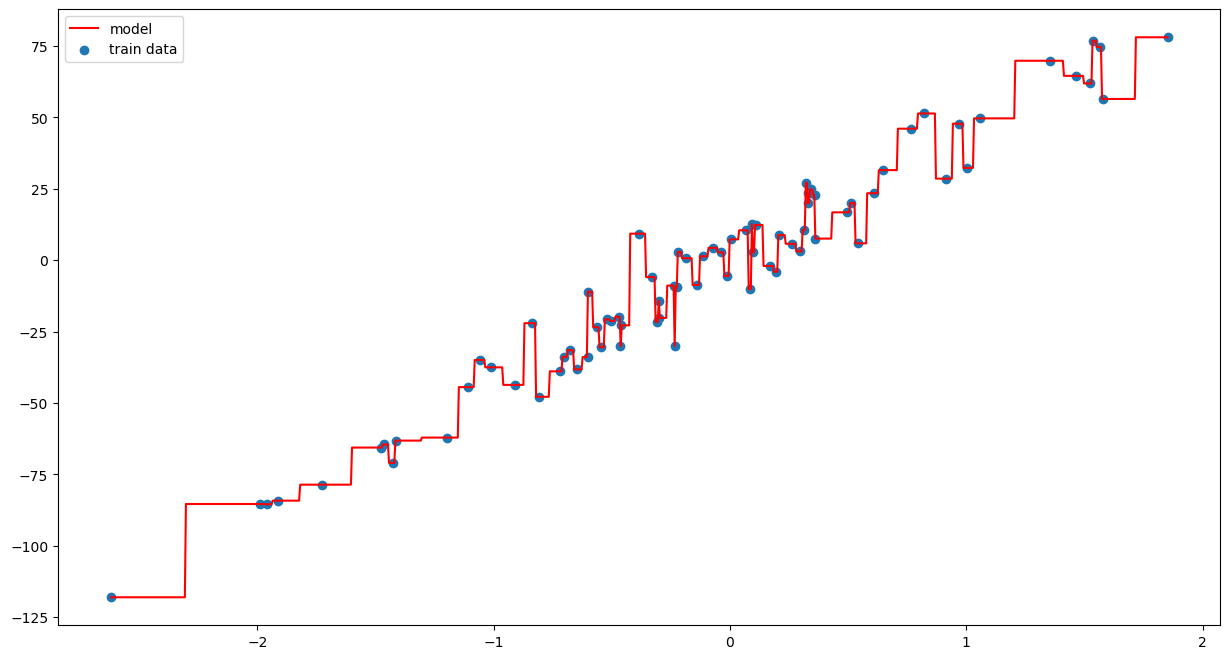

In [43]:
dots = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
pred_dots_over = tree_over.predict(dots)

plt.figure(figsize=(15, 8))
plt.plot(dots, pred_dots_over, c='r', label='model');
plt.scatter(X_train, y_train, label='train data')
plt.legend();

In [45]:
pred_test_over = tree_over.predict(X_test)
mse_test_over = mean_squared_error(y_test, pred_test_over)

print(f'MSE на тесте {mse_test_over:.2f}')

MSE на тесте 226.23


In [47]:
pd.DataFrame({
    'ground truth': y_test,
    'prediction': pred_test_over
})

,ground truth,prediction
0,-48.949080,-63.166093
1,89.033145,64.576002
2,44.409196,51.399979
3,-5.911314,9.317869
4,-7.624431,-29.996284
5,1.747639,-20.198703
6,-29.365934,-30.068883
7,-68.326754,-78.591791
8,35.765733,51.399979
9,50.779929,28.579735


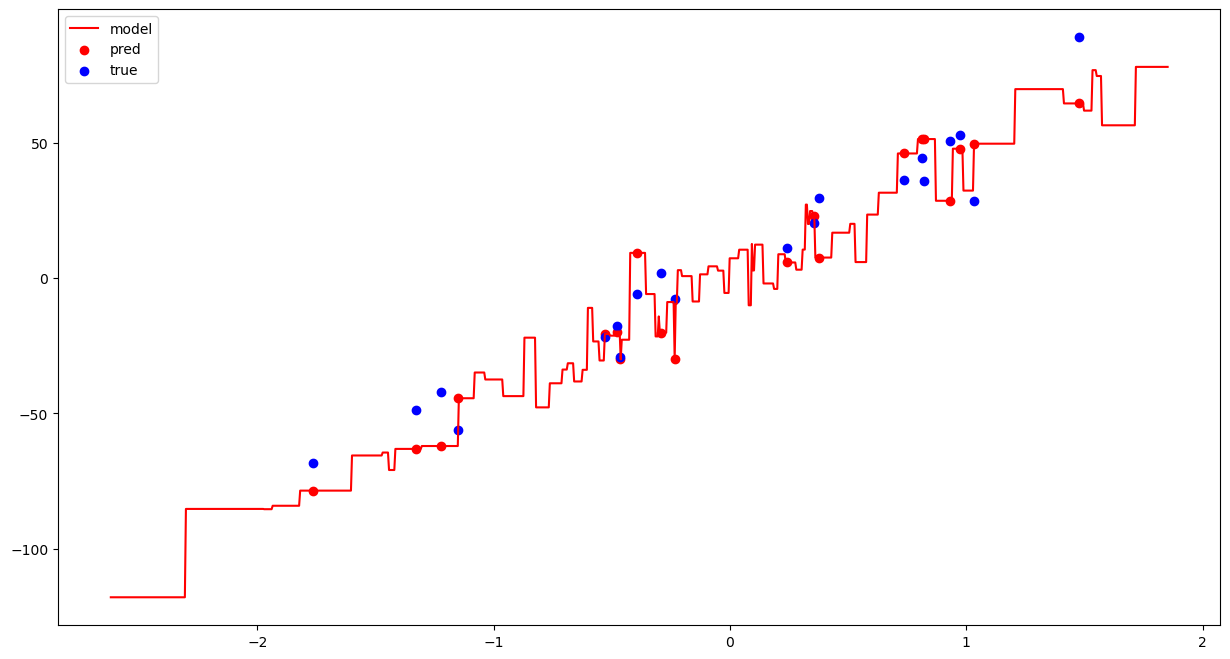

In [49]:
plt.figure(figsize=(15, 8))
plt.plot(dots, pred_dots_over, c='r', label='model');
plt.scatter(X_test, pred_test_over, c='r', label='pred')
plt.scatter(X_test, y_test, c='b', label='true')
plt.legend();